<h1><center>No-Show Doctor Appointments Analysis</center></h1> 
<h2><center>Project 1 by Aaliyah Motala</center></h2>

## Table of Contents

<ul>

 <li><a href="#intro">Introduction</a></li>
 <li><a href="#wrangling">Data Wrangling</a></li>
 <li><a href="#eda">Exploratory Data Analysis</a></li>
 <li><a href="#conclusions">Conclusions</a></li>

</ul>

<a id='intro'></a>
## Introduction

> A 'no-show' is term given to a patient who has scheduled an appointment yet did not make or 'show-up' to the appointment, this does not include a cancelation or a reschedule. Why is tracking no-shows so important? No-shows are a constant and long-standing issue for anyone in the medical field. 
>
>Missing an appointment doesn't seem like a big deal, however, almost half of patients skip their scheduled appointments. Studies have found that the healthcare industry loses billions of dollars annually due to no-shows. 
>
>Therefore, having accurate and consistant no-show data recorded, allows us to see how much of earnings are lost over time.
>Patients can miss appointments for many reasons such as logistical, environmenal and/or financial issues. 
>
><b>Questions to be answered by this dataset are as follows:</b> 
><ol>
    <li>Does a longer wait time increase no-shows?</li>
    <li>Do sms's decrease no-shows?</li>
    <li>What ages tend to miss appointments more?</li>
    <li>Which day has the most no-shows?</li>
    <li>Does an increase in disabilities, increase the chances of them being a no-show?</li>
></ol>
>
>This dataset tracks the no-shows in Brazil. The dataset (noshowappointments-kagglev2-may-2016) was taken from Kaggle on 04/Aug/22. The data will be analysed using Python and Pandas, Numpy and Matplotlib packages.


In [288]:
#The data dictionary is included as some columns can be confusing such as 'no show'

### Data Dictionary 
>
>Patient ID<br>
>-Patients unique number
>
>Appointment ID <br>
>-Appointment unique number<br>
<br>
>Gender<br>
>-Male or Female<br>
<br>
>Scheduled Day<br>
>-The day the appointment was made<br>
<br>
>Appointment Day <br>
>-The day of the appointment<br>
<br>
>Age<br>
>-Age of patient<br>
<br>
>Neighbourhood<br>
>-The area the appointment takes place<br>
<br>
>Scholarship<br>
>-Government subsidy for health care, True or False<br>
<br>
>Hipertension<br>
>-Health condition of High Blood Pressure, True or False<br>
<br>
>Diabetes<br>
>-Health condition of High Blood Sugar, True or False<br>
<br>
>Alcoholism<br>
>-Addiction to alcohol, True or False<br>
<br>
>Handcap<br>
>-Number of disabilites, 0 to 4   e.g. 3 would mean 3 disabilies<br>
<br>
>SMS Recieved <br>
>-Number of SMS's sent as reminders, True or False<br>
<br>
>No Show<br>
>-If the patient showed up the appointment, Yes = did not show and No = did show up

In [289]:
# Importing packages: 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
>
><dl>
>
> <dt><a href="#prop">General Properties</a></dt>
>    <dd>Assessing and understanding data.</dd><br>
><dt><a href="#clean">Data Cleaning</a></dt>
>    <dd>Transforming the dataset into one that can be analysed.</dd>
></dl>
>

<a id='prop'></a>
### General Properties


In [290]:
#Loading data 
#using df and noshow_df as there is only 1 dataset.

df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [291]:
df.head() 

#Checking what needs to be changed and the data formats

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [292]:
df.dtypes 

#understanded the data types and what should change

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [293]:
df.shape

#How many rows and columns

(110527, 14)

In [294]:
df.nunique()

#how many unqiue values for each column

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [295]:
print(df['Handcap'].unique())

#checking the values for handcap

[0 1 2 3 4]


In [296]:
print(df['Age'].unique())

#checking values for age

[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [297]:
sum(df.duplicated())

#checking for duplicates

0

In [298]:
df.isnull().values.any()

#checking for any null values

False

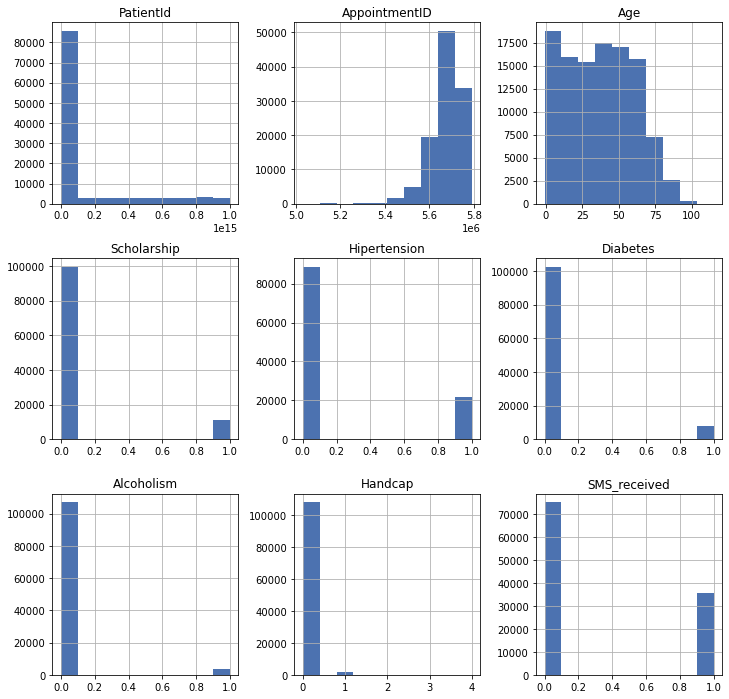

In [299]:
df.hist(figsize=(12,12), alpha=1);

#checking the values distribution for each variable

<a id='clean'></a>
### Data Cleaning

In [300]:
df.rename(columns = {'PatientId':'Patient_ID', 'AppointmentID':'Appointment_ID','ScheduledDay':'Scheduled_Day', 'AppointmentDay':'Appointment_Day', 'Hipertension':'Hypertension', 'Handcap':'Disability', 'No-show':'No_Show'}, inplace = True)

#Rename columns to make them easier to read by separating words and corrected spelling. 
#The word 'Handicap' is found offensive by many, so I've changed it to disability.

In [301]:
df.columns= df.columns.str.lower()
df.columns

#making all the columns lowercase

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'disability', 'sms_received',
       'no_show'],
      dtype='object')

In [302]:
df.head()

#Checking if they changed 

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,disability,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [303]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.normalize()
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.normalize()

#changing strings to date-time data type and removing time

In [304]:
df.head()

#Seeing the change. Time was irrelevant as only scheduled day had time

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,disability,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [305]:
df.dtypes

#checking if it changed

patient_id                     float64
appointment_id                   int64
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hypertension                     int64
diabetes                         int64
alcoholism                       int64
disability                       int64
sms_received                     int64
no_show                         object
dtype: object

In [306]:
df = df[(df.age >= 0) & (df.age <= 100)]

#Filtering for ages over 0 to 100 (exlcuding the outliers)

In [307]:
df['day_of_week'] = df['appointment_day'].dt.day_name()

#Creating a column with the days of the week of the appointment days

In [308]:
df.day_of_week.unique()

#checking values in the column

array(['Friday', 'Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Saturday'],
      dtype=object)

In [309]:
df['waiting_time'] = df['appointment_day'] - df['scheduled_day'] 

#how long patients waited for their appointment

In [310]:
df.waiting_time.unique()

#there are negative waiting times

array([                0,   172800000000000,   259200000000000,
          86400000000000,   345600000000000,   777600000000000,
        2505600000000000,   864000000000000,  1987200000000000,
         950400000000000,  1555200000000000,  1468800000000000,
        1209600000000000,  2419200000000000,  2073600000000000,
        1814400000000000,  1296000000000000,  1382400000000000,
        1900800000000000,  3715200000000000,  2592000000000000,
        2678400000000000,  3628800000000000,  2764800000000000,
        4838400000000000,  3888000000000000,  3974400000000000,
        3369600000000000,  3196800000000000,  3283200000000000,
        3801600000000000,  4320000000000000,  5184000000000000,
        4492800000000000,  4579200000000000,  5616000000000000,
        5788800000000000,  7862400000000000,  5702400000000000,
        7257600000000000,  6739200000000000,  7516800000000000,
        9936000000000000,  9417600000000000,  5443200000000000,
        6048000000000000,  6220800000000

In [311]:
df = (df[(df['appointment_day']>df['scheduled_day'])])

#dropping negative waiting times

In [312]:
df.shape

#checking new shape, about 33000 rows were dropped

(71954, 16)

<a id='eda'></a>
## Exploratory Data Analysis

<ol>

 <li><a href="#wait">Waiting time and No-shows</a></li>
 <li><a href="#sms">SMS recieved and No-shows</a></li>
 <li><a href="#age">Age groups and No-shows</a></li>
 <li><a href="#day">Days of the week and No-shows</a></li>
 <li><a href="#Disability">Disabilities and No-shows</a></li>


</ol>

<a id='wait'></a>
### 1. Does a longer wait time increase no-shows?

>According to <a href=https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7280239/>Marbouh, D. et. al. (2020)</a>, a longer waiting period between the initial appointment made and the actual appointment, increases no-shows. This could be due to many factors such as forgetfulness, loss in urgency to treat condition etc. 

In [340]:
df["waiting_time"].value_counts()

#checking the value counts for waiting time

2 days      6724
4 days      5290
1 days      5213
7 days      4906
6 days      4037
            ... 
132 days       1
125 days       1
117 days       1
146 days       1
123 days       1
Name: waiting_time, Length: 128, dtype: int64

In [341]:
df['wait_time'] = df['waiting_time'].astype(str)

#converting int to a string so I can remove "days"

In [342]:
df['wait_time'].dtype

#confirming its a string

dtype('O')

In [343]:
df['wait_time'] = df['wait_time'].str.replace("days", "")

#removing the word days

In [344]:
print(df['wait_time'])

#checking

5          2 
6          2 
7          2 
9          2 
10         2 
         ... 
110522    35 
110523    35 
110524    41 
110525    41 
110526    41 
Name: wait_time, Length: 71954, dtype: object


In [345]:
df['wait_time'] = df['wait_time'].astype(int)

#int so its easier to sort for graphs

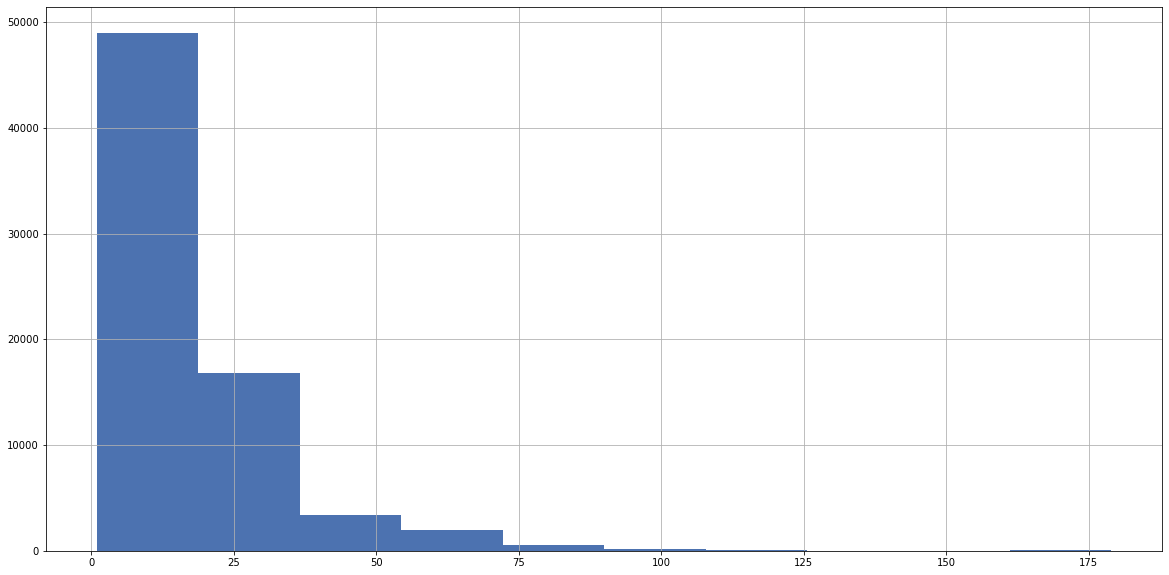

In [346]:
ax = df.wait_time.hist(figsize=(20,10))
plt.show()

#distribution of wait time 

>We can see that most people will wait around 0 to 15 days. Values distribution is right skewed.

In [362]:
df.no_show.replace(("Yes", "No"), ("yes", "no"), inplace=True)

#changing it to lowercase

no_show
no     15.013396
yes    17.218627
Name: wait_time, dtype: float64


(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

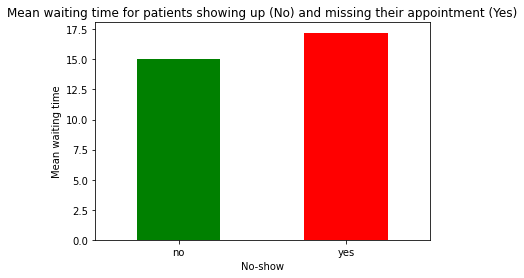

In [363]:
mean_wait_time = df.groupby('no_show')['wait_time'].mean()
print(mean_wait_time)
mean_wait_time.plot(kind='bar', title='Mean waiting time for patients showing up (No) and missing their appointment (Yes)', color=['green', 'red']);
plt.xlabel("No-show");
plt.ylabel('Mean waiting time');
plt.xticks(rotation=0)

#Plotting mean wait time for patients who aren't a no-show and who are a no-show. 
#Green is a positive colour so this was given to people who showed up 
#Red was given to people who missed their appointment

>It shows that the mean waiting time for no-shows are higher. So a higher waiting time between appointments can cause more no-shows.

In [370]:
total_no_no_show = df.query("no_show == 'no'")["wait_time"].count()
print(total_no_no_show)

#Total of attended patients

51435


In [365]:
total_no_show = df["no_show"].count()
print(total_no_show)

#total patients

71954


In [371]:
total_yes_no_show = df.query("no_show == 'yes'")["wait_time"].count()
print(total_yes_no_show)

#total no-show patients

20519


In [375]:
percent_no_no_shows = (total_no_no_show/ total_no_show.sum()) * 100
print(percent_no_no_shows)

#Percentage of patients attended appointments 

71.48316980292965


In [376]:
percent_yes_no_shows = (total_yes_no_show/ total_no_show.sum()) * 100
print(percent_yes_no_shows)

#percentage of no-show patients

28.51683019707035


Text(0.5, 1.0, 'Proportion of yes and no no-shows in database')

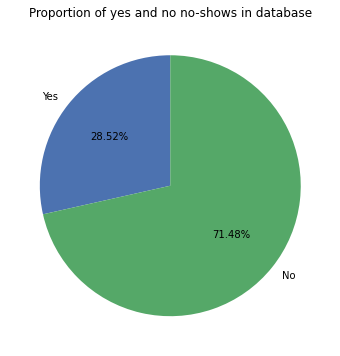

In [374]:
labels = 'Yes', 'No'
sizes = [percent_no_no_shows, percent_yes_no_shows]
plt.figure( figsize = (6,6))
plt.pie(sizes, labels=labels, autopct='%.2f%%', startangle=90)
plt.title("Proportion of yes and no no-shows in database")

#plotting pie for showing the percentage of patients who are a no-show and who attended appointments

> This gives us a good idea of the proportion of no-shows we're working with in the database

In [394]:
wait_time_0 = df.query("wait_time >= 0" and "wait_time <= 3")
total_0 = wait_time_0["no_show"].count()
print(total_0)

#Filtering for 0 to 3 days of waiting time

14672


In [395]:
yes1 = (wait_time_0.query("no_show == 'yes'")["wait_time"].count()/total_no_show)
no1 = (wait_time_0.query("no_show == 'no'")["wait_time"].count()/total_no_show)

#The no-shows and patients attended filter to the waiting time

In [396]:
wait_time_35 = df.query("wait_time => 4" and "wait_time <= 7")
total_35 = wait_time_35["no_show"].count()
print(total_35)

#Filtering for 4 to 7 days of waiting time

32182


In [397]:
yes2 = (wait_time_35.query("no_show == 'yes'")["wait_time"].count()/total_no_show)
no2 = (wait_time_35.query("no_show == 'no'")["wait_time"].count()/total_no_show)

#The no-shows and patients attended filter to the waiting time

In [398]:
wait_time_710 = df.query("wait_time => 8" and "wait_time <= 14")
total_710 = wait_time_710["no_show"].count()
print(total_710)

#Filtering for 8 to 14 days of waiting time

44207


In [399]:
yes3 = (wait_time_710.query("no_show == 'yes'")["wait_time"].count()/total_no_show)
no3 = (wait_time_710.query("no_show == 'no'")["wait_time"].count()/total_no_show)

#The no-shows and patients attended filter to the waiting time

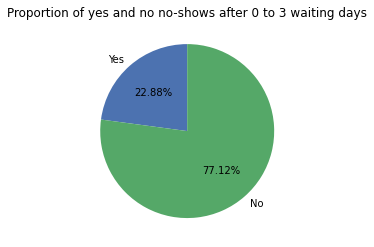

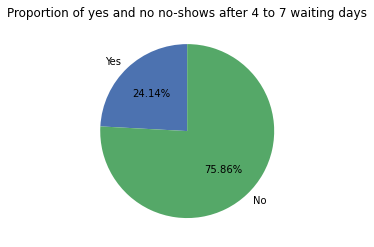

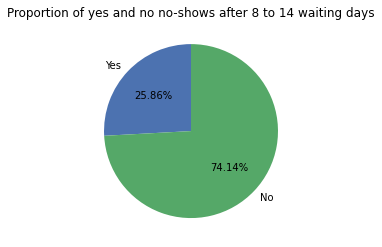

In [400]:
plt.figure(0)
labels = 'Yes', 'No'
sizes = [yes1, no1]
plt.pie(sizes, labels=labels, autopct='%.2f%%', startangle=90)
plt.title("Proportion of yes and no no-shows after 0 to 3 waiting days");

plt.figure(1)
labels = 'Yes', 'No'
sizes = [yes2, no2]
plt.pie(sizes, labels=labels, autopct='%.2f%%', startangle=90)
plt.title("Proportion of yes and no no-shows after 4 to 7 waiting days");

plt.figure(2)
labels = 'Yes', 'No'
sizes = [yes3, no3]
plt.pie(sizes, labels=labels, autopct='%.2f%%', startangle=90)
plt.title("Proportion of yes and no no-shows after 8 to 14 waiting days");

plt.show()

#plotting all 3 pie charts in the same figure so comparisons can be made

>This is an interesting find. You can see the percentage of no-shows go up as the waiting time increases. Does waiting time affect no-shows? From the data we have and the analysis we ran, yes. However, further studies with probability testing need to be considered. 

<a id='sms'></a>
### Does sending an SMS decrease no-show?

> According to a study by <a href=https://bmcophthalmol.biomedcentral.com/articles/10.1186/1471-2415-8-9sending/>Koshy, E. et. al. (2008)</a>, SMS's prior to the appointment, decreases no-shows by almost 38%. Does this occur in this data as well?

In [413]:
yes_sms = df.query("sms_received == 1")["sms_received"].count()
print(yes_sms)

#counting how many patients recieved sms

35481


In [414]:
no_sms = df.query("sms_received == 0")["sms_received"].count()

#counting how many patients who did not recieve an sms

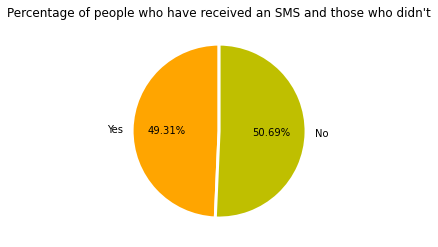

In [427]:
labels = 'Yes', 'No'
sizes = [yes_sms, no_sms]
color = ['orange','y']
plt.pie(sizes, labels=labels, autopct='%.2f%%', startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors = color)
plt.title("Percentage of people who have received an SMS and those who didn't");

#plotting pie of percentage of people who recieved an SMS and those who didn't

>Almost half of the patients received an SMS, yet no-shows proportion was high.

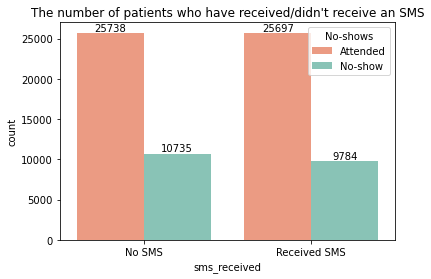

In [460]:
ax = sns.countplot(x=df.sms_received, hue=df.no_show, palette=["#fc9272", "#7fcdbb"])
ax.set_title("The number of patients who have received/didn't receive an SMS")
x_ticks_labels=['No SMS', 'Received SMS']
ax.set_xticklabels(x_ticks_labels)
for i in ax.containers:
    ax.bar_label(i,)
#code for setting values

plt.legend(title='No-shows', loc='upper right', labels=['Attended', 'No-show'])
plt.show()

#plotting noshows vs sms received

>Even though patients who received and didn't receive an sms was almost the 50% each (previous figure). The number of no-shows are also almost the same. 

In [435]:
prop = df[df.no_show == 'no'].groupby(['sms_received']).size()/df.groupby(['sms_received']).size()
print(prop)
prop2 = df[df.no_show == 'yes'].groupby(['sms_received']).size()/df.groupby(['sms_received']).size()
print(prop2)

#getting proportions of yes and no for no_show

sms_received
0    0.705673
1    0.724247
dtype: float64
sms_received
0    0.294327
1    0.275753
dtype: float64


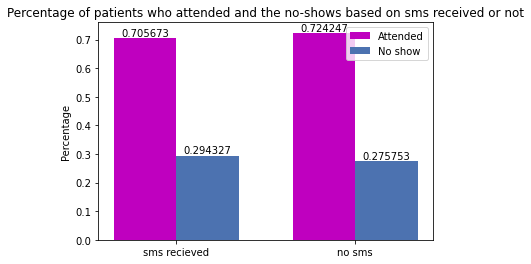

In [464]:
labels = ['sms recieved', 'no sms']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, prop, width, label='Attended', color = 'm')
bar2 = ax.bar(x + width/2, prop2, width, label='No show')


ax.set_ylabel('Percentage')
ax.set_title('Percentage of patients who attended and the no-shows based on sms received or not')
ax.set_xticks(x, labels)
ax.legend(loc= "upper right")

ax.bar_label(bar1)
ax.bar_label(bar2)

plt.show()

#plotting the proportions

>Looking at proportions rather than values, we can clearly state now that there has been no significant difference in a decrease in no-shows with an sms reminder. There was actually a slight increase in no-shows with those who received an SMS

<a id='age'></a>
### What age group has more no-shows?

>The ages will be grouped and analysed. Does a particular age group tend to miss appointments more? Does ages under 18 have low no-shows because parents are worried about their kids health? 

In [465]:
df["age"].describe()

#getting the general understanding of this age column. 
#max age is 100 and min age is 0 as per our filtering

count    71954.000000
mean        38.497429
std         22.917899
min          0.000000
25%         19.000000
50%         39.000000
75%         57.000000
max        100.000000
Name: age, dtype: float64

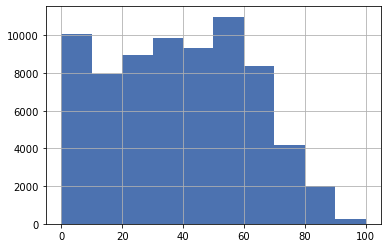

In [466]:
df["age"].hist();

#Looking at the distribution, right-skewed. 

In [467]:
df['age_group'] = pd.qcut(df['age'], q=5, labels=['0 to 18', '19 to 35', '36 to 55', '56 to 75', '76 to 100'])
df['age_group'].count()

#creating bins for the ages, qcut cuts the data automatically based on q (how many bins you want).

71954

In [468]:
age_group_totals = df.groupby('age_group').count()['no_show']
print(age_group_totals)

#checking the bins and amounts

age_group
0 to 18      14431
19 to 35     14478
36 to 55     15200
56 to 75     14005
76 to 100    13840
Name: no_show, dtype: int64


In [469]:
age_no_show_counts = df.groupby(['no_show','age_group'])['age_group'].size()
print(age_no_show_counts)

#total in each age bin
#using size(), gets size of bin, same as using count() but for groups

no_show  age_group
no       0 to 18       9835
         19 to 35      9388
         36 to 55     10561
         56 to 75     10641
         76 to 100    11010
yes      0 to 18       4596
         19 to 35      5090
         36 to 55      4639
         56 to 75      3364
         76 to 100     2830
Name: age_group, dtype: int64


In [470]:
total_no_shows = df.groupby('no_show').count()['age_group']
print(total_no_shows)

#total patients that attend and dont show

no_show
no     51435
yes    20519
Name: age_group, dtype: int64


In [471]:
age_no_show_total = df.groupby(['no_show','age_group'])['age_group'].size()
print(age_no_show_total) 

#total patients in bins

no_show  age_group
no       0 to 18       9835
         19 to 35      9388
         36 to 55     10561
         56 to 75     10641
         76 to 100    11010
yes      0 to 18       4596
         19 to 35      5090
         36 to 55      4639
         56 to 75      3364
         76 to 100     2830
Name: age_group, dtype: int64


In [472]:
age_no_ns_prop = age_no_show_counts['no'] / total_no_shows['no']
age_yes_ns_prop = age_no_show_counts['yes'] / total_no_shows['yes']

print(age_no_ns_prop)
print(age_yes_ns_prop)

#getting proportions of each bin

age_group
0 to 18      0.191212
19 to 35     0.182522
36 to 55     0.205327
56 to 75     0.206882
76 to 100    0.214057
Name: age_group, dtype: float64
age_group
0 to 18      0.223988
19 to 35     0.248063
36 to 55     0.226083
56 to 75     0.163946
76 to 100    0.137921
Name: age_group, dtype: float64


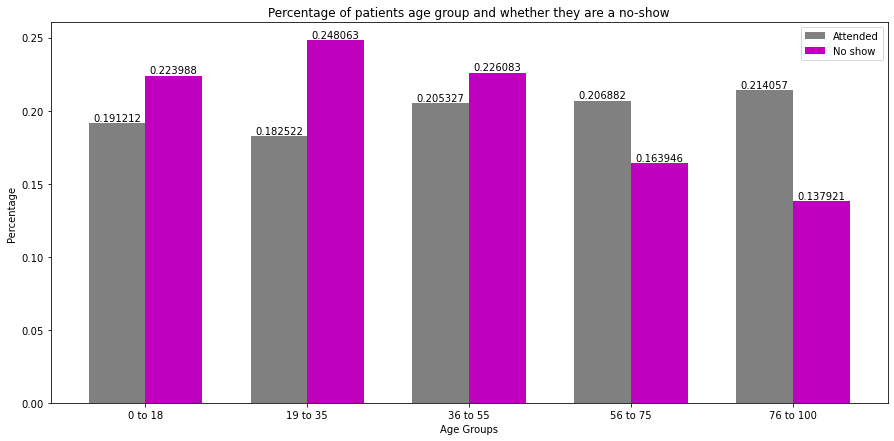

In [473]:
labels =['0 to 18', '19 to 35', '36 to 55', '56 to 75', '76 to 100']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[15,7])
bar1 = ax.bar(x - width/2, age_no_ns_prop, width, label='Attended', color = 'gray')
bar2 = ax.bar(x + width/2, age_yes_ns_prop, width, label='No show', color = 'm')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_xlabel('Age Groups')
ax.set_title('Percentage of patients age group and whether they are a no-show')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(bar1)
ax.bar_label(bar2)

plt.show();

#PLotting proportion graph of the age groups

>Interestingly,we can see that no-shows are high for the first 3 age groups. The age group (0 to 18) was high because it could be that parents were too busy to take their child or the child didn't need to see a doctor anymore. No-show patients are the highest for the young adults (19 to 35), there are many factors here that we do not know of as transport issues, work issues etc. Young adults also don't care about their health as much as older adults; this can be seen from ages 56 to 100, as patients attended is higher.

<a id='day'></a>
### 4. Which day has the most no-shows?

>Does one day of the week experience more no-shows than other days? 

In [474]:
df.head()

#checking data

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,disability,sms_received,no_show,day_of_week,waiting_time,wait_time,age_group
5,9.598513e+13,5626772,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,no,Friday,2 days,2,76 to 100
6,7.336882e+14,5630279,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,yes,Friday,2 days,2,19 to 35
7,3.449833e+12,5630575,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,yes,Friday,2 days,2,36 to 55
9,7.812456e+13,5629123,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,no,Friday,2 days,2,19 to 35
10,7.345362e+14,5630213,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,no,Friday,2 days,2,19 to 35


In [475]:
print(df.groupby('day_of_week')['no_show'].size())

#Looking at counts for the days

day_of_week
Friday       12515
Monday       14580
Saturday        31
Thursday     11322
Tuesday      16462
Wednesday    17044
Name: no_show, dtype: int64


In [478]:
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories= 
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

#The days are out of order and would appear like that on a graph (i tried) so it needs to be ordered.

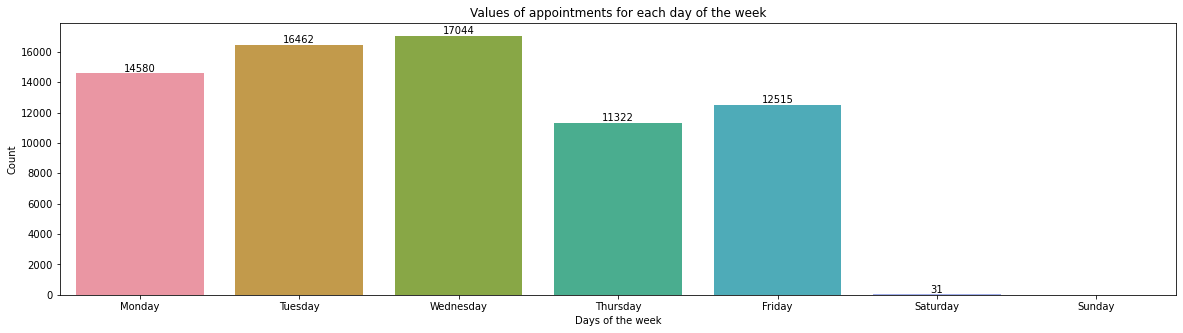

In [479]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=df.day_of_week)
ax.set_ylabel('Count')
ax.set_title('Values of appointments for each day of the week')
ax.set_xlabel('Days of the week')
ax.bar_label(ax.containers[0])
plt.show()

#plotting the values in a graph to get a visualisation

>First thing, Sunday is missing. I would assume like South Africa, this is the day doctors clinics, medical centers etc. are closed for a break. Brazil is also a majority Catholic state, on sundays its the lords day, this could be a reason as well. Again, in South Africa, Saturdays are usually a short or half day for medical practices; this could explain saturday as well. 
>
>Wednesday has the most patients and Thursday the least. 

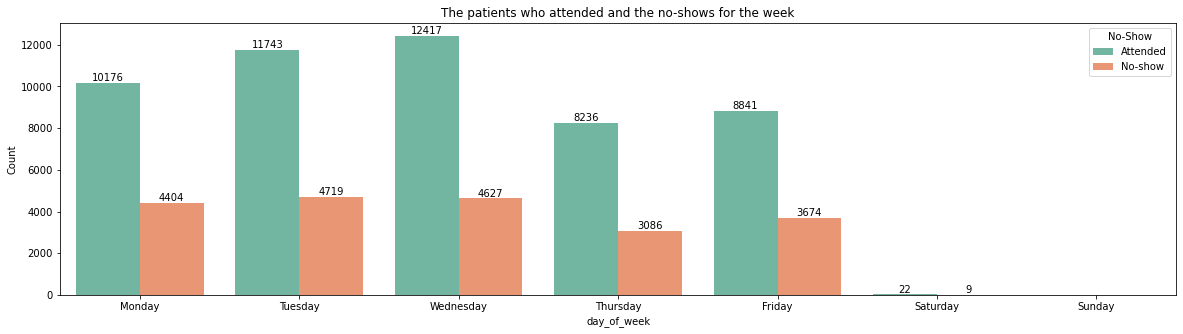

In [482]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=df.day_of_week, hue=df.no_show, palette="Set2")
ax.set_ylabel('Count')
ax.set_title('The patients who attended and the no-shows for the week')
for container in ax.containers:
    ax.bar_label(container)
plt.legend(title='No-Show', loc='upper right', labels=['Attended', 'No-show'])
plt.show()

#filtering the patients into no-shows and attended

>Even though Wednesday has the highest amount of patients, Tuesday has no shows. 
>
>Thursday that had the least amount of patients, has the lowest no-shows (excluding Saturday).

In [483]:
week_day_totals = df.groupby('day_of_week').count()['no_show']
print(week_day_totals)

#totals for days

day_of_week
Monday       14580
Tuesday      16462
Wednesday    17044
Thursday     11322
Friday       12515
Saturday        31
Sunday           0
Name: no_show, dtype: int64


In [484]:
day_ns_counts = df.groupby(['no_show','day_of_week'])['day_of_week'].size()/week_day_totals
print(day_ns_counts)

#proportions for the days

no_show  day_of_week
no       Monday         0.697942
         Tuesday        0.713340
         Wednesday      0.728526
         Thursday       0.727433
         Friday         0.706432
         Saturday       0.709677
         Sunday              NaN
yes      Monday         0.302058
         Tuesday        0.286660
         Wednesday      0.271474
         Thursday       0.272567
         Friday         0.293568
         Saturday       0.290323
         Sunday              NaN
dtype: float64


In [487]:
no_prop = df[df.no_show == 'no'].groupby(['day_of_week']).size()/df.groupby(['day_of_week']).size()
print(no_prop)

#just separating it so i can plot it. I couldn't figure out how to plot 2 bars from 1 variable.

day_of_week
Monday       0.697942
Tuesday      0.713340
Wednesday    0.728526
Thursday     0.727433
Friday       0.706432
Saturday     0.709677
Sunday            NaN
dtype: float64


In [488]:
yes_prop = df[df.no_show == 'yes'].groupby(['day_of_week']).size()/df.groupby(['day_of_week']).size()
print(yes_prop)

#separating

day_of_week
Monday       0.302058
Tuesday      0.286660
Wednesday    0.271474
Thursday     0.272567
Friday       0.293568
Saturday     0.290323
Sunday            NaN
dtype: float64


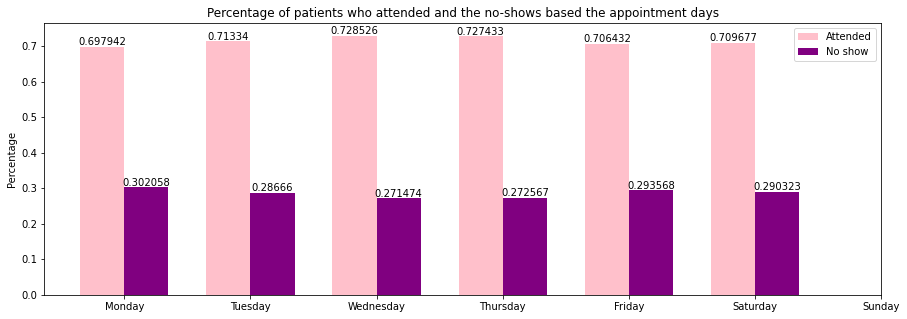

In [490]:
labels =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = [15,5])
bar1 = ax.bar(x - width/2, no_prop, width, label='Attended', color = 'pink')
bar2 = ax.bar(x + width/2, yes_prop, width, label='No show', color = 'purple')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Percentage of patients who attended and the no-shows based the appointment days')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(bar1)
ax.bar_label(bar2)

plt.show()

#plotting the proportions of the days graph

>Proportion wise, there are no signficant differences between the days. Wednesday has the lowest no-shows while Monday has the highest. So a patient is more likely to miss an appointment if its on a Monday. 

<a id='disability'></a>
### 5. Does an increase in disabilities increase the chances of them being a no-show?

>Disabilities were given to patients from a range of 0 to 4. 0 being no disabilities, 1 being 1 disability, 2 being 2 disabilities etc. The question here tries to investigate if have a higher disability score, increases the chances of a patient being a no-show. 

<AxesSubplot:xlabel='age', ylabel='disability'>

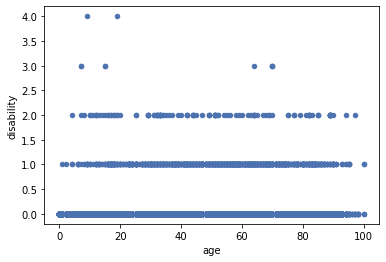

In [491]:
df.plot.scatter(x = 'age', y = 'disability')

#basic plot, im trying to see whats the distribution amongst the ages. 

<AxesSubplot:>

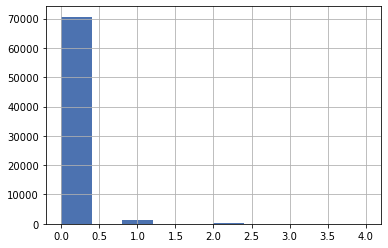

In [492]:
df['disability'].hist()

#just to see what this shows

>Since zero disabilities dwarf the other catergories, a proportion graph is needed to get a proper comparison.

In [498]:
dis_total = df.groupby(['disability']).size()
print(dis_prop)

#total for disability catergories

disability
0    70650
1     1182
2      112
3        8
4        2
dtype: int64


In [499]:
no_prop = df[df.no_show == 'no'].groupby(['disability']).size()/df.groupby(['disability']).size()
print(no_prop)

#proportion for attended for disabilities

disability
0    0.714253
1    0.751269
2    0.696429
3    0.750000
4    0.500000
dtype: float64


In [500]:
yes_prop = df[df.no_show == 'yes'].groupby(['disability']).size()/df.groupby(['disability']).size()
print(no_prop)

#proportion for no-show for disabilities

disability
0    0.714253
1    0.751269
2    0.696429
3    0.750000
4    0.500000
dtype: float64


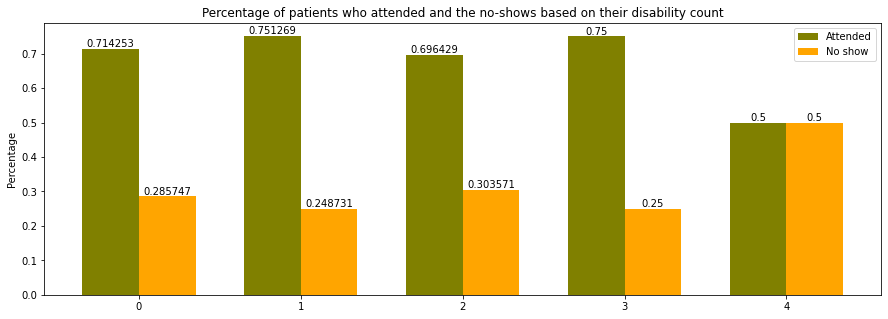

In [496]:
labels =['0', '1', '2', '3', '4']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = [15,5])
bar1 = ax.bar(x - width/2, no_prop, width, label='Attended', color = 'olive')
bar2 = ax.bar(x + width/2, yes_prop, width, label='No show', color = 'orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Percentage of patients who attended and the no-shows based on their disability count')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(bar1)
ax.bar_label(bar2)

plt.show()

#plotting proportion graph

>The proportion of the 4 disabilities stand out the most. It's split 50/50 so if a person has 4 disabilities and they make an appointment, the chance of them being a no-show is 50%. 
>
>A person with 1 disability has the highest attendence proportion, while a person with 1 has the lowest. 
>


<a id='conclusions'></a>
## Conclusions

> In this analysis, 5 questions were investigated. Here is a quick summary of each question: <br>
> 1. Does waiting time increase no-shows?<br>
> Yes but by small proportions as time went on. <br>
> 2. Does sending an SMS, decrease no-shows?<br>
> There was actually a slight increase in no-shows with those who received an SMS. SMS did not help reduce no-shows.<br>
> 3. What ages tend to miss appointments more?<br>
> This was interesting as all ages from 0 to 55 had higher no-shows. Age group 19-35 had the highest no-shows.<br>
> 4. Which day has the most no-shows?<br>
> Monday has the highest no-show while Wednesday has the most patients.<br>
> 5. Does an increase in disabilities, increase the chances of them being a no-show?<br>
> Yes, at 4 disabilities, theres a 50% chance the person will be a no-show.<br>
><br>
>Can a no-show be predicted? yes but with more analyses of other medical factors, neighbourhood and of course, an inferential study.
><br>
>**Limitations**: Please note that there are limitations to this analysis:<br>
>The analysis on the data is purely visual and descriptive. To get a better grasp on the data as well as more substantial results, inferential statistics need to be carried out. We cannot deduce any signficant results from this analysis.

>Thank you.